In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [19]:
# Load dataset
data = pd.read_csv(r"C:\Pratham\programmingProjects\pythonProgrammes\Python-code-practice\ChurnPredictionANN\Churn_Modelling.csv")

In [20]:
# Display first few rows
print("Dataset Preview:")
print(data.head())

Dataset Preview:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       

In [21]:
# Drop unnecessary columns
data = data.drop(columns=["RowNumber", "CustomerId", "Surname"], axis=1)


In [22]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data = pd.get_dummies(data, columns=['Geography'], drop_first=True)

In [23]:
# Define features and target variable
X = data.drop(columns=["Exited"], axis=1)
y = data["Exited"]

In [24]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

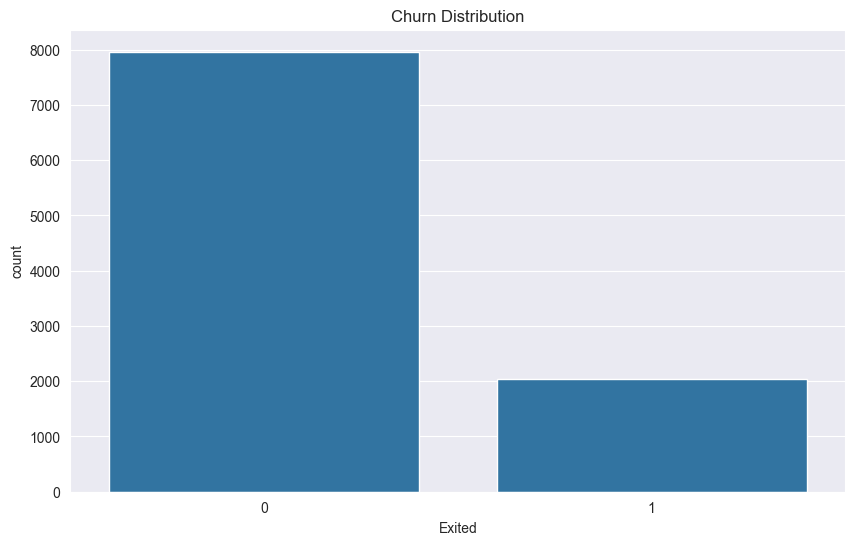

In [26]:
# Visualize dataset distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=y)
plt.title("Churn Distribution")
plt.show()

In [27]:
# Build ANN model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

C:\Pratham\programmingProjects\pythonProgrammes\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6845 - loss: 0.6185 - val_accuracy: 0.8145 - val_loss: 0.4469
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8005 - loss: 0.4814 - val_accuracy: 0.8200 - val_loss: 0.4073
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8099 - loss: 0.4483 - val_accuracy: 0.8300 - val_loss: 0.3910
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8230 - loss: 0.4181 - val_accuracy: 0.8435 - val_loss: 0.3765
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8287 - loss: 0.4158 - val_accuracy: 0.8485 - val_loss: 0.3646
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8274 - loss: 0.4097 - val_accuracy: 0.8500 - val_loss: 0.3586
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8359 - loss: 0.3979 - val_accuracy: 0.8585 - val_loss: 0.3545
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8320 - loss: 0.3988 - val_accuracy: 0.

In [30]:
# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8632 - loss: 0.3341
Test Accuracy: 0.8605


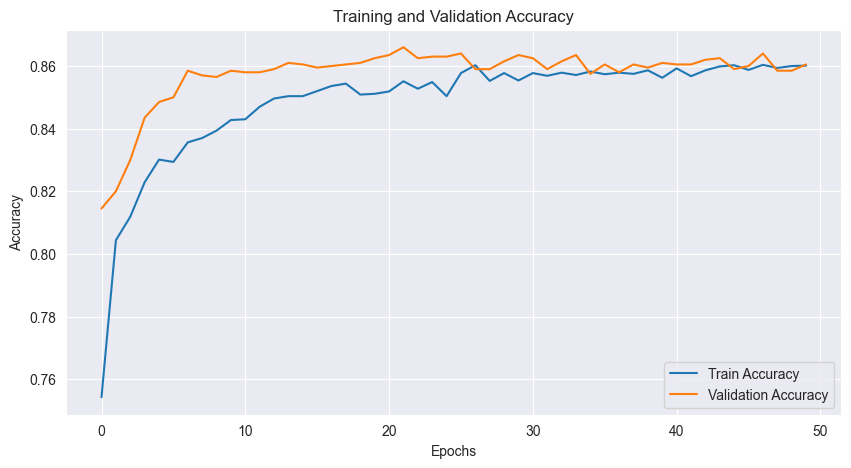

In [31]:
# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

In [32]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report

y_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


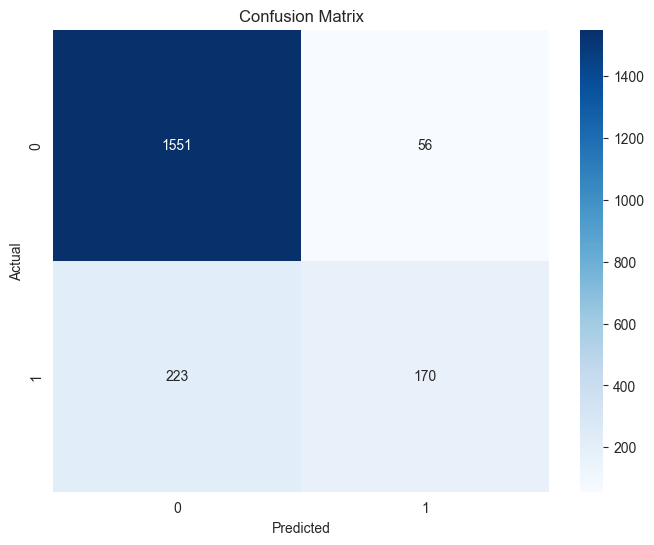

In [33]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


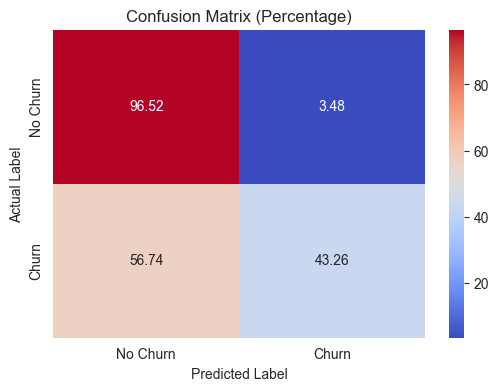

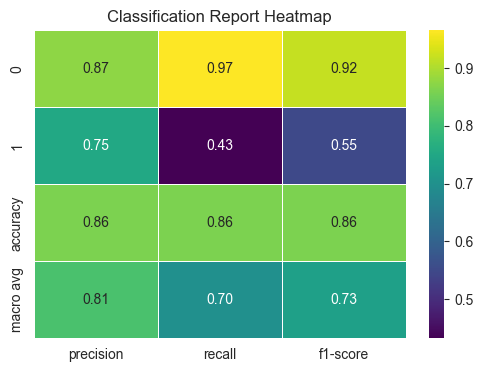

AttributeError: 'Sequential' object has no attribute 'predict_proba'

In [34]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
# 
# # Generate Predictions
# y_pred = model.predict(X_test)
# y_pred = (y_pred > 0.5)  # Convert probabilities to binary values (0 or 1)
# 
# # Compute Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# 
# # 1️⃣ CONFUSION MATRIX (PERCENTAGE HEATMAP)
# cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
# 
# plt.figure(figsize=(6, 4))
# sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
# plt.xlabel("Predicted Label")
# plt.ylabel("Actual Label")
# plt.title("Confusion Matrix (Percentage)")
# plt.show()
# 
# # 2️⃣ CLASSIFICATION REPORT (HEATMAP REPRESENTATION)
# report = classification_report(y_test, y_pred, output_dict=True)
# df_report = pd.DataFrame(report).T
# 
# plt.figure(figsize=(6, 4))
# sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="viridis", linewidths=0.5, fmt=".2f")
# plt.title("Classification Report Heatmap")
# plt.show()
# 
# # 3️⃣ ROC CURVE (SEABORN STYLING)
# y_prob = model.predict_proba(X_test)[:, 1]  # Get probability scores
# fpr, tpr, _ = roc_curve(y_test, y_prob)
# roc_auc = auc(fpr, tpr)
# 
# plt.figure(figsize=(6, 4))
# sns.lineplot(x=fpr, y=tpr, color="blue", label=f'ROC curve (AUC = {roc_auc:.2f})')
# sns.lineplot(x=[0, 1], y=[0, 1], color="grey", linestyle="--")  # Random classifier line
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve")
# plt.legend()
# plt.show()


In [ ]:
# Final Summary
total_customers = len(y)
active_customers = (y == 0).sum()
churned_customers = (y == 1).sum()

print(f"Total Customers: {total_customers}")
print(f"Active Customers: {active_customers}")
print(f"Churned Customers: {churned_customers}")
print(f"Out of {total_customers} customers, {active_customers} are still active, while {churned_customers} have left.")


In [ ]:
model.save("churn_model.keras")
model.summary()